The goal of this analysis is to explore the given data to tell our client which airports to avoid and which to book from for future travel.

In [ ]:
import pandas as pd

#load json dataset
airports_data_json = pd.read_json('/content/drive/MyDrive/Inpleo/airports.json')



#check the first few rows of dataset
airports_data_json.head()

,Airport,Time,Statistics
0,"{'Code': 'ATL', 'Name': 'Atlanta, GA: Hartsfie...","{'Label': '2003/06', 'Month': 6, 'Month Name':...","{'# of Delays': {'Carrier': 1009, 'Late Aircra..."
1,"{'Code': 'BOS', 'Name': 'Boston, MA: Logan Int...","{'Label': '2003/06', 'Month': 6, 'Month Name':...","{'# of Delays': {'Carrier': 374, 'Late Aircraf..."
2,"{'Code': 'BWI', 'Name': 'Baltimore, MD: Baltim...","{'Label': '2003/06', 'Month': 6, 'Month Name':...","{'# of Delays': {'Carrier': 296, 'Late Aircraf..."
3,"{'Code': 'CLT', 'Name': 'Charlotte, NC: Charlo...","{'Label': '2003/06', 'Month': 6, 'Month Name':...","{'# of Delays': {'Carrier': 300, 'Late Aircraf..."
4,"{'Code': 'DCA', 'Name': 'Washington, DC: Ronal...","{'Label': '2003/06', 'Month': 6, 'Month Name':...","{'# of Delays': {'Carrier': 283, 'Late Aircraf..."


In [ ]:
from pandas import json_normalize

# convert dataframe into more usable format
airports_raw = json_normalize(airports_data_json.to_dict(orient="records"))
airports_raw.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


Now that I converted the data into a usable format, I will clean the data to perform accurate analysis.

In [ ]:
# find the number of rows with missing values
num_missing_values = airports_raw.isnull().sum()
print("Number of missing rows:", num_missing_values)

Number of missing rows: Airport.Code                                           0
Airport.Name                                           0
Time.Label                                             0
Time.Month                                             0
Time.Month Name                                        0
Time.Year                                              0
Statistics.# of Delays.Carrier                         0
Statistics.# of Delays.Late Aircraft                   0
Statistics.# of Delays.National Aviation System        0
Statistics.# of Delays.Security                        0
Statistics.# of Delays.Weather                         0
Statistics.Carriers.Names                              0
Statistics.Carriers.Total                              0
Statistics.Flights.Cancelled                           0
Statistics.Flights.Delayed                             0
Statistics.Flights.Diverted                            0
Statistics.Flights.On Time                             0
Statist

It seems that no rows have empty values.

In [ ]:
# find the number of duplicate rows
num_duplicate_rows = airports_raw.duplicated().sum()
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  0


It also seems that there are no duplicate entries. While the data seems to be clean, it's always important to check for dirty data.

# First Glance

To get a grasp of the dataset, I found all of the columns in the dataset.

In [ ]:
# rename dataset
airports_df = airports_raw

airports_df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather'],
      dtype='object')

First, I counted the number of airports represented in the dataset.

In [ ]:
# find number of airports in dataset
airports_df['Airport.Code'].unique().size

29

I also found the date range of the dataset to better understand the context of the data.



In [ ]:
# find the date range in the dataset
airports_df['Time.Datetime'] = pd.to_datetime(airports_df['Time.Label'])
oldest_date = airports_df['Time.Datetime'].min()
newest_date = airports_df['Time.Datetime'].max()

print("Oldest: ", oldest_date)
print("Newest: ", newest_date)

Oldest:  2003-06-01 00:00:00
Newest:  2013-03-01 00:00:00


<ipython-input-14-6fb4ba15a958>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airports_df['Time.Datetime'] = pd.to_datetime(airports_df['Time.Label'])


Then, to better understand the data itself, I investigated some basic statistics of important features in the data, including the number of flights at each airport each month, as well as the proportion of flights that were on time.

In [ ]:
# statistics for # of flights per month per airport
print("Total # of flights (per month per airport):")
print("Min: ", airports_df["Statistics.Flights.Total"].min())
print("Max: ", airports_df["Statistics.Flights.Total"].max())
print("Mean: ", airports_df["Statistics.Flights.Total"].mean())
print("Median: ", airports_df["Statistics.Flights.Total"].median(), "\n")

# calculate the proportion of flights on time
airports_df["Proportions.Flights.On Time"] = airports_df["Statistics.Flights.On Time"]/airports_df["Statistics.Flights.Total"]
# statistics for # of flights per month per airport
print("Proportion of flights on time (per month per airport):")
print("Min: ", airports_df["Proportions.Flights.On Time"].min())
print("Max: ", airports_df["Proportions.Flights.On Time"].max())
print("Mean: ", airports_df["Proportions.Flights.On Time"].mean())
print("Median: ", airports_df["Proportions.Flights.On Time"].median())

Total # of flights (per month per airport):
Min:  3566
Max:  38241
Mean:  12084.098418277681
Median:  9970.0 

Proportion of flights on time (per month per airport):
Min:  0.4695732654612766
Max:  0.9344229217110573
Mean:  0.7791806412466727
Median:  0.7879697296150077


Another important metric is how many minutes a flight is delayed. One might expect more delays to occur during busier times of the year (holidays, summer, etc.), so I plotted the previously calculated "proportion of flights on time" metric over time to find out. I noticed that in the 'Months' column, some of the values had different types, so I cleaned that up.

Text(0.5, 1.0, 'Proportion of Flights On Time in Each Month')

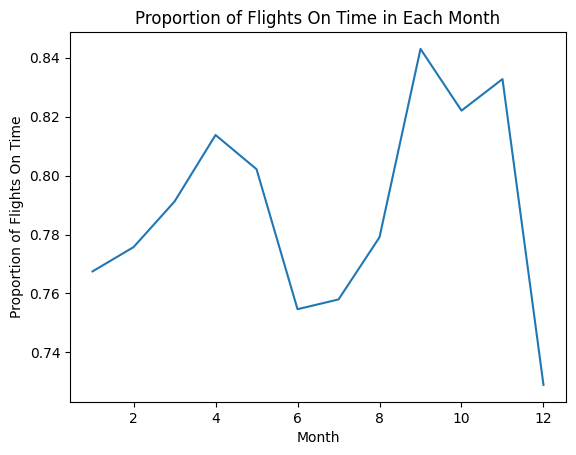

In [ ]:
import matplotlib.pyplot as plt

# fix data
airports_df['Time.Month'] = airports_df['Time.Month'].astype(int)

# find median proportion of flights on time per month across all airports and all years
median_proportions_month = airports_df.groupby(['Time.Month'])['Proportions.Flights.On Time'].median().reset_index()

# plot the medians
plt.plot('Time.Month', 'Proportions.Flights.On Time', data=median_proportions_month)
plt.xlabel('Month')
plt.ylabel('Proportion of Flights On Time')
plt.title("Proportion of Flights On Time in Each Month")

As was expected, a lower proportion of flights are on time during the summer and winter holiday season when compared to the other times of year.

Next, I wanted to see how many of each airline was hosted at each airport in the dataset, as well as which airports hosted Northwest Airlines. Because the number of airlines at each airport could vary over time, and because Northwest Airlines merged into Delta Airlines in 2010, I decided to only calculate this number in the beginning of 2009. I felt that the most recent date which could contain Northwest Airlines would be most relevant to today.

In [ ]:
# fix data
airports_df["Statistics.Carriers.Total"] = airports_df["Statistics.Carriers.Total"].astype(int)

# use only data from Jan. 2009
df_2009 = airports_df[airports_df["Time.Label"] == "2009/01"]
# find which airports in 2009 hosted Northwest Airlines
df_2009["Northwest"] = df_2009['Statistics.Carriers.Names'].str.contains("Northwest Airlines Inc.", na=False)

# create a frequency table with only the relevant columns
frequency_table = df_2009[["Airport.Name", "Statistics.Carriers.Names", "Statistics.Carriers.Total", "Northwest"]]

# find the airports with the most and least amounts of carriers
most_carriers = frequency_table["Statistics.Carriers.Total"].max()
least_carriers = frequency_table["Statistics.Carriers.Total"].min()
airports_with_most_carriers = frequency_table[frequency_table["Statistics.Carriers.Total"] == most_carriers]
airports_with_least_carriers = frequency_table[frequency_table["Statistics.Carriers.Total"] == least_carriers]

print("Most amount of carriers (in 2009): ", most_carriers)
print(" Airports with this amount of carriers: ", airports_with_most_carriers.shape[0])
print(" Airport Name: ", airports_with_most_carriers["Airport.Name"], "\n")

# airports with least amount of carriers
print("Least amount of carriers (in 2009): ", least_carriers)
print(" Airports with this amount of carriers: ", airports_with_least_carriers.shape[0])
print(" Airport Name: ", airports_with_least_carriers["Airport.Name"], "\n")

# airports with Northwest Airlines
print("# of airports with Northwest Airlines (in 2009): ", df_2009["Northwest"].value_counts()[True])

Most amount of carriers (in 2009):  16
 Airports with this amount of carriers:  1
 Airport Name:  1950    Detroit, MI: Detroit Metro Wayne County
Name: Airport.Name, dtype: object 

Least amount of carriers (in 2009):  6
 Airports with this amount of carriers:  1
 Airport Name:  1960    Chicago, IL: Chicago Midway International
Name: Airport.Name, dtype: object 

# of airports with Northwest Airlines (in 2009):  29


<ipython-input-17-60beaa8b184b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009["Northwest"] = df_2009['Statistics.Carriers.Names'].str.contains("Northwest Airlines Inc.", na=False)


In 2009, Detroit's airport had the most carriers with 16, while Chicago's airport had the least with 6. Also, all 29 airports had Northwest Airlines, which suggests that Northwest was very popular in 2009, which might be why Northwest and Delta merged.

There are a few other metrics I explored that I felt could give the client valuable information about which airports to avoid and which to book for future travel.

While the proportion of flights on time is important, I would expect cancelled and diverted flights to be more troublesome for fliers than delayed flights, so I calculated the median proportion of cancelled or diverted flights for each airport.

In [ ]:
# find the proportion of flights cancelled or diverted
airports_df["Statistics.Flights.Cancelled"] = airports_df["Statistics.Flights.Cancelled"].astype(int)
airports_df["Statistics.Flights.Diverted"] = airports_df["Statistics.Flights.Diverted"].astype(int)
airports_df["Proportions.Flights.Cancelled or Diverted"] = (airports_df["Statistics.Flights.Cancelled"] + airports_df["Statistics.Flights.Diverted"])/airports_df["Statistics.Flights.Total"]

# relevant statistics for proportion of flights cancelled or diverted
print("Proportion of flights on cancelled or diverted (per month per airport):")
print("Min: ", airports_df["Proportions.Flights.Cancelled or Diverted"].min())
print("Max: ", airports_df["Proportions.Flights.Cancelled or Diverted"].max())
print("Mean: ", airports_df["Proportions.Flights.Cancelled or Diverted"].mean())
print("Median: ", airports_df["Proportions.Flights.Cancelled or Diverted"].median())

# sort the medians to find the airports that typically have the highest and lowest proportions of flights cancelled or diverted
median_proportions_airport = airports_df.groupby(['Airport.Name'])['Proportions.Flights.Cancelled or Diverted'].median().reset_index()
median_proportions_airport = median_proportions_airport.sort_values("Proportions.Flights.Cancelled or Diverted").reset_index(drop=True)
median_proportions_airport


Proportion of flights on cancelled or diverted (per month per airport):
Min:  0.0010193679918450561
Max:  0.22747861097131353
Mean:  0.01937510108297155
Median:  0.013632980712290927


,Airport.Name,Proportions.Flights.Cancelled or Diverted
0,"Portland, OR: Portland International",0.006963
1,"Orlando, FL: Orlando International",0.007016
2,"Tampa, FL: Tampa International",0.007147
3,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",0.007503
4,"Seattle, WA: Seattle/Tacoma International",0.007888
5,"Las Vegas, NV: McCarran International",0.007967
6,"Salt Lake City, UT: Salt Lake City International",0.009274
7,"Baltimore, MD: Baltimore/Washington Internatio...",0.009723
8,"Chicago, IL: Chicago Midway International",0.010389
9,"San Diego, CA: San Diego International",0.010569


It seems that New York's airport has almost 1% more diverted or cancelled flights than any other airport at about 4%, while Chicago's and Newark's airports also a cancellation or diversion rate above 3%. Therefore, these might be airports to avoid if possible.

Alternatively, Portland, Orlando, and Tampa's airports, among others, have extremely low cancellation or diversion rates around 0.7% or lower, which indicates that these are relatively more reliable airports.

Another metric I wanted to calculate was the number of delays due to security, because such delays might make travellers feel unsafe at these airports.

In [33]:
# find proportion of flights delayed due to security issues, and order by the median
airports_df["Proportions.Flights.Security Delays"] = airports_df["Statistics.# of Delays.Security"]/airports_df["Statistics.Flights.Total"]
print("Proportion of flights on delayed due to security issues (per month per airport):")
print("Min: ", airports_df["Proportions.Flights.Security Delays"].min())
print("Max: ", airports_df["Proportions.Flights.Security Delays"].max())
print("Mean: ", airports_df["Proportions.Flights.Security Delays"].mean())
print("Median: ", airports_df["Proportions.Flights.Security Delays"].median())

median_proportions_airport = airports_df.groupby(['Airport.Name'])['Proportions.Flights.Security Delays'].median().reset_index()
median_proportions_airport = median_proportions_airport.sort_values("Proportions.Flights.Security Delays").reset_index(drop=True)



median_proportions_airport

Proportion of flights on delayed due to security issues (per month per airport):
Min:  -0.0002157497303128371
Max:  0.00705371676614216
Mean:  0.0005514881905845984
Median:  0.000419265266459985


,Airport.Name,Proportions.Flights.Security Delays
0,"New York, NY: LaGuardia",0.000126
1,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",0.000200
2,"Chicago, IL: Chicago O'Hare International",0.000219
3,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",0.000231
4,"Philadelphia, PA: Philadelphia International",0.000273
5,"Washington, DC: Washington Dulles International",0.000276
6,"Boston, MA: Logan International",0.000278
7,"Charlotte, NC: Charlotte Douglas International",0.000284
8,"Washington, DC: Ronald Reagan Washington National",0.000286
9,"Detroit, MI: Detroit Metro Wayne County",0.000304


It seems that Phoenix, Seattle, and Chicago's airports have the most security delays at around 0.07%, while Atlanta, Chicago, and Dallas/Fort Worth's airports have the least at 0.0126%. It is important to note that these are very low proportions for all airports.

In [ ]:
import scipy.stats as stats
data_by_airport = [group["Proportions.Flights.Security Delays"].values for name, group in airports_df.groupby("Airport.Name")]

# Perform the Kruskal-Wallis H-test
kruskal_result = stats.kruskal(*data_by_airport)
kruskal_result

KruskalResult(statistic=769.7497568101467, pvalue=4.794245125611465e-144)

However, I did conduct a statistical test using the Kruskal-Wallis H-test, which suggests that these results are statistically significant, which suggests that some airports are indeed less safe than others.

# Data Manipulation

## Task 1

In [ ]:
# Create a dictionary that has ‘Airport/Code’ as the keys and ‘Carriers/Names’ and ‘Carriers/Total’ as values; export this dictionary as a json file.
airport_carriers_dict = {
    row['Airport.Code']: {
        'Carriers Names': row['Statistics.Carriers.Names'],
        'Carriers Total': row['Statistics.Carriers.Total']
    }
    for _, row in airports_df.iterrows()
}

# export dictionary as JSON
import json
with open('/content/drive/MyDrive/Inpleo/airports_carriers_dict.json', "w") as file:
  json.dump(airport_carriers_dict, file)

## Task 2

In [ ]:
# Create a dataframe that has Airport, ‘Label’ (year/month), and ‘# of Delays’ (‘Late Aircraft’) as the values.
delays_df = airports_df[['Airport.Code', 'Time.Label', 'Statistics.# of Delays.Late Aircraft']].copy()
delays_df.rename(columns={
    'Airport.Code': 'Airport',
    'Time.Label': 'Label (year/month)',
    'Statistics.# of Delays.Late Aircraft': '# of Delays (Late Aircraft)'
}, inplace=True)
delays_df.head()

,Airport,Label (year/month),# of Delays (Late Aircraft)
0,ATL,2003/06,1275
1,BOS,2003/06,495
2,BWI,2003/06,477
3,CLT,2003/06,472
4,DCA,2003/06,268


<ipython-input-34-b65f563dc259>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  delays_time_series['Label (year/month)'] = pd.to_datetime(delays_time_series['Label (year/month)'])


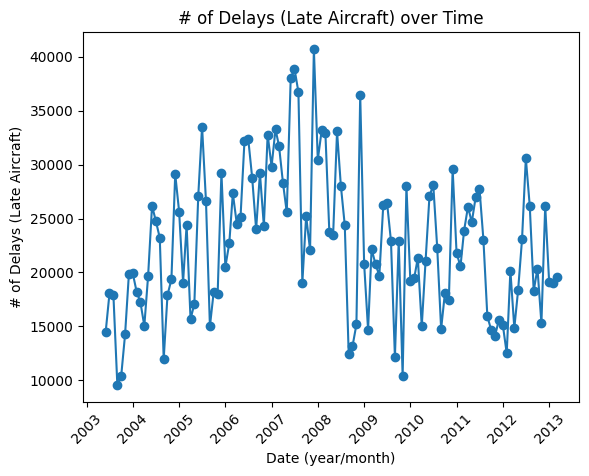

In [34]:
# Plot the # of Delays due to late aircraft over time.

# sum number of delays for each date
delays_time_series = delays_df.groupby('Label (year/month)')['# of Delays (Late Aircraft)'].sum().reset_index()

# convert date to datetime and sort to be able to graph
delays_time_series['Label (year/month)'] = pd.to_datetime(delays_time_series['Label (year/month)'])
delays_time_series.sort_values('Label (year/month)', inplace=True)

# plot
plt.plot('Label (year/month)', '# of Delays (Late Aircraft)', data=delays_time_series, marker='o')
plt.xlabel('Date (year/month)')
plt.ylabel('# of Delays (Late Aircraft)')
plt.title('# of Delays (Late Aircraft) over Time')
plt.xticks(rotation=45)
plt.show()

While this graph is insightful, it might be useful to group by year, rather than by date, due to variance in proportion of late aircrafts associated with different times of year.

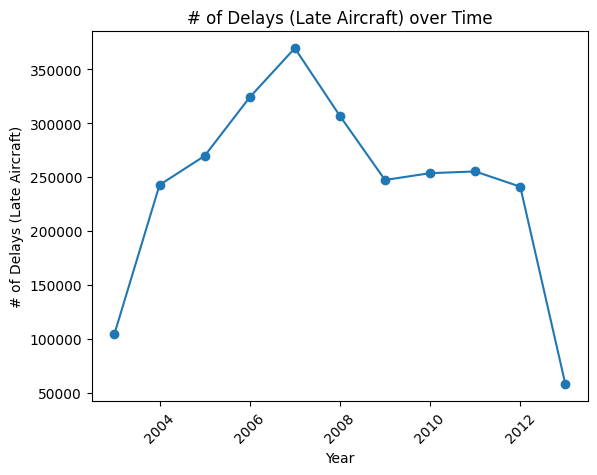

In [41]:
delays_df = airports_df[['Airport.Code', 'Time.Year', 'Statistics.# of Delays.Late Aircraft']].copy()
delays_df.rename(columns={
    'Airport.Code': 'Airport',
    'Time.Year': 'Year',
    'Statistics.# of Delays.Late Aircraft': '# of Delays (Late Aircraft)'
}, inplace=True)

delays_df["Year"] = pd.to_numeric(delays_df["Year"])

# Plot the # of Delays due to late aircraft over time.

# sum number of delays for each date
delays_time_series = delays_df.groupby('Year')['# of Delays (Late Aircraft)'].sum().reset_index()

# sort data by year
delays_time_series.sort_values('Year', inplace=True)

# plot
plt.plot('Year', '# of Delays (Late Aircraft)', data=delays_time_series, marker='o')
plt.xlabel('Year')
plt.ylabel('# of Delays (Late Aircraft)')
plt.title('# of Delays (Late Aircraft) over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Which year/month had the most delays due to late aircraft? How about the least?
max_delays = delays_time_series.loc[delays_time_series['# of Delays (Late Aircraft)'].idxmax()]
min_delays = delays_time_series.loc[delays_time_series['# of Delays (Late Aircraft)'].idxmin()]

# Output the findings
max_delays['Label (year/month)'], max_delays['# of Delays (Late Aircraft)'], min_delays['Label (year/month)'], min_delays['# of Delays (Late Aircraft)']

(Timestamp('2007-12-01 00:00:00'),
 40727,
 Timestamp('2003-09-01 00:00:00'),
 9552)

December 2009 had the most delays due to late aircraft, with 40,727. September 2003 had the least delays due to late aircraft, with 9,552.

In [ ]:
# Which airport had the most delays all of 2010?

# get rows in year 2010
delays_2010 = delays_df[delays_df['Label (year/month)'].str.contains('2010')]

# sum the delays for the year for each airport
delays_2010_sum = delays_2010.groupby('Airport')['# of Delays (Late Aircraft)'].sum().reset_index()

# find the airport with most delays
max_delays_2010 = delays_2010_sum.loc[delays_2010_sum['# of Delays (Late Aircraft)'].idxmax()]

max_delays_2010['Airport'], max_delays_2010['# of Delays (Late Aircraft)']

('ATL', 26305)

The Atlanta airport had the most delays in 2010 due to late aircraft, with 26,305.

## Task 3

In [ ]:
# Using the excel file ‘airline-codes’, make a list of the airlines present in this dataset along with their corresponding codes.

# read the airline-codes excel file, then make it into a list and then dictionary
airline_codes_df = pd.read_excel('/content/drive/MyDrive/Inpleo/airline-codes.xlsx')
airlines_list = airline_codes_df[['Airline', 'Code']].values.tolist()
airline_code_dict = {name: code for name, code in airlines_list}

In [ ]:
# find all unique carriers/airlines in the dataset
airlines_present_df = airports_df["Statistics.Carriers.Names"]
airlines_present_set = set(name.strip() for names in airlines_present_df.dropna() for name in names.split(','))

# convert the set to a list
airlines_present_list = list(airlines_present_set)


# make list of tuples of all airlines in dataset with corresponding code
airlines_with_code_present = [(name, airline_code_dict.get(name, None)) for name in airlines_present_list]

# Now `airlines_present` will be a list of tuples with airline names and their codes (or None if no code is found)
print(len(airlines_with_code_present), "airlines present")
airlines_with_code_present

25 airlines present


[('United Air Lines Inc.', 'UA'),
 ('JetBlue Airways', 'B6'),
 ('Atlantic Southeast Airlines', None),
 ('US Airways Inc.', 'US'),
 ('Continental Air Lines Inc.', 'CO'),
 ('American Airlines Inc.', 'AA'),
 ('Independence Air', 'DH'),
 ('Atlantic Coast Airlines', None),
 ('Pinnacle Airlines Inc.', None),
 ('American Eagle Airlines Inc.', None),
 ('America West Airlines Inc.', None),
 ('ExpressJet Airlines Inc.', 'EV'),
 ('Comair Inc.', 'OH (1)'),
 ('Frontier Airlines Inc.', 'F9'),
 ('Alaska Airlines Inc.', 'AS'),
 ('ATA Airlines d/b/a ATA', 'TZ'),
 ('Northwest Airlines Inc.', 'NW'),
 ('Hawaiian Airlines Inc.', 'HA'),
 ('AirTran Airways Corporation', 'FL'),
 ('Delta Air Lines Inc.', 'DL'),
 ('SkyWest Airlines Inc.', 'OO'),
 ('Aloha Airlines Inc.', 'AQ'),
 ('Southwest Airlines Co.', 'WN'),
 ('Virgin America', 'VX'),
 ('Mesa Airlines Inc.', 'YV')]

# Analysis

## Task 1

In [ ]:
# Determine if there is a significant difference between the average number of flights
# delayed each month and the average number of flights cancelled each month.

# calculate total # of delays
airports_df['Statistics.# of Delays.Total'] = (
    airports_df['Statistics.# of Delays.Carrier'] +
    airports_df['Statistics.# of Delays.Late Aircraft'] +
    airports_df['Statistics.# of Delays.National Aviation System'] +
    airports_df['Statistics.# of Delays.Security'] +
    airports_df['Statistics.# of Delays.Weather']
)


airports_df['Time.Month'] = pd.to_numeric(airports_df['Time.Month'])
airports_df['Statistics.# of Delays.Total'] = pd.to_numeric(airports_df['Statistics.# of Delays.Total'])
airports_df['Statistics.Flights.Cancelled'] = pd.to_numeric(airports_df['Statistics.Flights.Cancelled'])

# Calculate the average number of delays and cancellations each month
monthly_averages = airports_df.groupby('Time.Month').agg({
    'Statistics.# of Delays.Total': 'mean',
    'Statistics.Flights.Cancelled': 'mean'
}).reset_index()

# Rename columns for clarity
monthly_averages.rename(columns={
    'Statistics.# of Delays.Total': 'Average # of Delays',
    'Statistics.Flights.Cancelled': 'Average # of Cancellations'
}, inplace=True)

monthly_averages

# conduct t test
import scipy.stats as stats
from scipy.stats import ttest_rel

#check for normality of data (commented out, but the qq-plots indicated normality, so we can apply the t-test)
# stats.probplot(monthly_averages["Average # of Delays"], dist="norm", plot=plt)
# stats.probplot(monthly_averages["Average # of Cancellations"], dist="norm", plot=plt)

t_stat, p_val = ttest_rel(monthly_averages["Average # of Delays"], monthly_averages["Average # of Cancellations"])

print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 22.50656082318728, P-value: 1.500627118530839e-10


With a P-value of 1.5e-10 ≈ 0 < 0.05, there is statistically significant evidence that the average number of delays per month and the average number of cancellations per month are different.

## Task 2

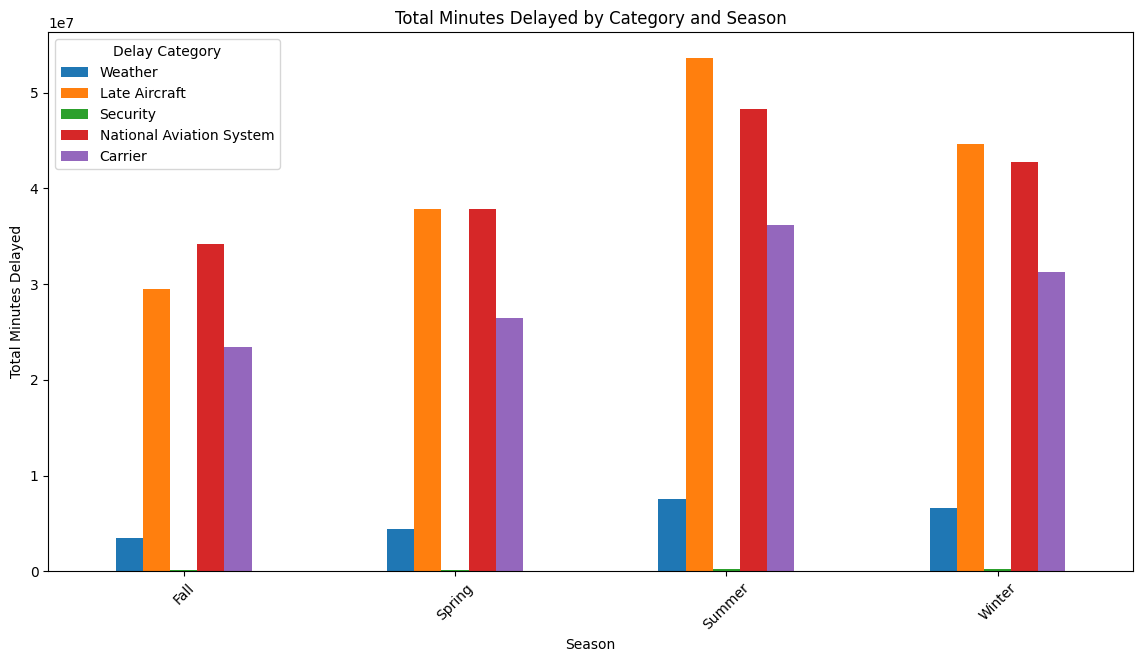

In [ ]:
#  Extract all fields in the ‘Minutes Delayed’ section by month.

# columns of interest
delay_columns = [
    'Statistics.Minutes Delayed.Weather',
    'Statistics.Minutes Delayed.Late Aircraft',
    'Statistics.Minutes Delayed.Security',
    'Statistics.Minutes Delayed.National Aviation System',
    'Statistics.Minutes Delayed.Carrier'
]
# convert columns to numeric
for column in delay_columns:
    airports_df[column] = pd.to_numeric(airports_df[column], errors='coerce')


# Split the year into four seasons: Dec-Feb, March-May, June-Aug, Sept-Nov.
def month_to_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Fall'
airports_df['Season'] = airports_df['Time.Month'].apply(month_to_season)


# Is there a relationship between minutes delayed (by category) and season?
seasonal_delays = airports_df.groupby('Season')[['Statistics.Minutes Delayed.Weather',
                                                 'Statistics.Minutes Delayed.Late Aircraft',
                                                 'Statistics.Minutes Delayed.Security',
                                                 'Statistics.Minutes Delayed.National Aviation System',
                                                 'Statistics.Minutes Delayed.Carrier']].sum()

seasonal_delays.rename(columns={'Statistics.Minutes Delayed.Weather': 'Weather',
                                                 'Statistics.Minutes Delayed.Late Aircraft' : 'Late Aircraft',
                                                 'Statistics.Minutes Delayed.Security' : 'Security',
                                                 'Statistics.Minutes Delayed.National Aviation System' : 'National Aviation System',
                                                 'Statistics.Minutes Delayed.Carrier' : 'Carrier'}, inplace=True)

# plot minutes delayed by season
seasonal_delays.plot(kind='bar', figsize=(14, 7))
plt.title('Total Minutes Delayed by Category and Season')
plt.xlabel('Season')
plt.ylabel('Total Minutes Delayed')
plt.xticks(rotation=45)
plt.legend(title='Delay Category')
plt.show()

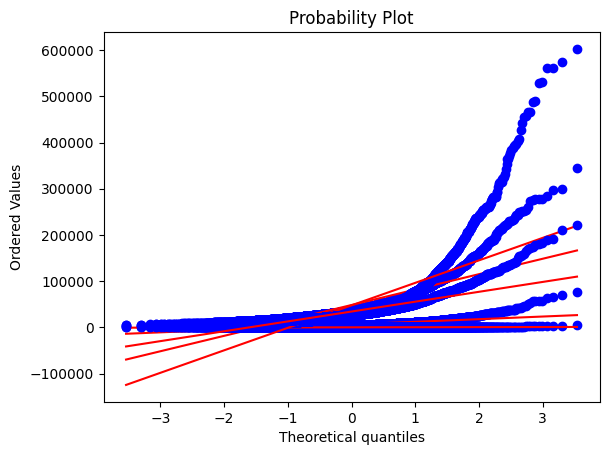

In [ ]:
# apply an ANOVA test to test if the means for each season are different for each delay type

delay_categories = [
    'Weather',
    'Late Aircraft',
    'Security',
    'National Aviation System',
    'Carrier'
]

anova_results = {}

for category in delay_categories:
    # Note: Adjust the column names like 'Statistics.Minutes Delayed.Weather' to match your DataFrame
    stats.probplot(airports_df[f"Statistics.Minutes Delayed.{category}"], dist="norm", plot=plt)

Based on the QQ-plots, it seems that the data is not normally distributed, so I will use the Kruskal-Wallis H-test instead.

In [ ]:
# apply the Kruskal-Wallis H-test to determine if the groups are statistically significantly different
from scipy.stats import kruskal

kruskal_results = {}

for category in delay_categories:
    # Prepare a list to hold the groups
    data_groups = []

    for season in airports_df['Season'].unique():
        # Select the delay minutes for the current category and season
        season_data = airports_df.loc[airports_df['Season'] == season, f'Statistics.Minutes Delayed.{category}'].dropna()
        data_groups.append(season_data)

    # Perform the Kruskal-Wallis H-test and store the results
    stat, p = kruskal(*data_groups)
    kruskal_results[category] = {'Statistic': stat, 'p-value': p}

# Display the results
for category, results in kruskal_results.items():
    print(f"Kruskal-Wallis H-test Results for {category} Delays:")
    print(f"Statistic: {results['Statistic']}, p-value: {results['p-value']}\n")

Kruskal-Wallis H-test Results for Weather Delays:
Statistic: 543.4609421865244, p-value: 1.8166740084007525e-117

Kruskal-Wallis H-test Results for Late Aircraft Delays:
Statistic: 429.24584798954385, p-value: 1.0227035929280259e-92

Kruskal-Wallis H-test Results for Security Delays:
Statistic: 174.50168772015962, p-value: 1.3575241647068526e-37

Kruskal-Wallis H-test Results for National Aviation System Delays:
Statistic: 122.03010265661595, p-value: 2.8196136873493785e-26

Kruskal-Wallis H-test Results for Carrier Delays:
Statistic: 284.7656343126949, p-value: 1.9707393236424603e-61



Based on the Kruskal-Wallis H-test, it seems that for each category of delay, the minutes delayed is statistically significantly different between the seasons. If we examine the previous graphs, we notice that the mean minutes for all delay types are in the following order by season (ascending order): fall, spring, winter, summer.

## Task 3

In [ ]:
# If a flight at ATL has a delay, what is the probability that the delay is due to…
atl_df = airports_df[airports_df["Airport.Code"] == "ATL"]
total_delays_at_atl = atl_df["Statistics.# of Delays.Total"].sum()

# Weather?

weather_delays_at_atl = atl_df["Statistics.# of Delays.Weather"].sum()
# best estimator for probaility of weather delay
probability_weather_delay_atl = weather_delays_at_atl/total_delays_at_atl


# Late Aircraft?
late_delays_at_atl = atl_df["Statistics.# of Delays.Late Aircraft"].sum()
# best estimator for probaility of late aircraft delay
probability_late_aircraft_delay_atl = late_delays_at_atl/total_delays_at_atl


print(f"Probability of delay due to weather at ATL: {probability_weather_delay_atl:.4f}")
print(f"Probability of delay due to late aircraft at ATL: {probability_late_aircraft_delay_atl:.4f}")

Probability of delay due to weather at ATL: 0.0400
Probability of delay due to late aircraft at ATL: 0.2742


The best estimation of the probability of delay at Atlanta airport being due to weather is 0.04, while the probability of delay at Atlanta airport being due to a late aircraft is 0.2742.